In [87]:
import json
import requests

import pandas as pd
from pandas.io.json import json_normalize
import datetime,time
from datetime import datetime
from math import atan2,degrees
import numpy as np

import matplotlib.pyplot as plt

In [88]:
#for animation
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [89]:
import random
from collections import defaultdict

In [90]:
import sys,warnings

#ignore by message
warnings.filterwarnings("ignore", )

In [91]:
url = "https://api.covid19india.org/state_district_wise.json"
data = requests.get(url)
content = data.content

In [92]:
today = datetime.today().strftime('%b-%d')

In [93]:
d=json.loads(content)

In [94]:
a_df = pd.DataFrame(columns = ['notes','active','confirmed','deceased','recovered','delta.confirmed',
                               'delta.deceased','delta.recovered','state','district'])
for key in d.keys():
    for k1 in d[key]:
        for k2 in d[key][k1]:
            if k1=='statecode':
                continue
            else:
                df=json_normalize( d[key][k1][k2])
                s=pd.Series({'state':key,'district':k2})
                df=df.merge(s.to_frame().T, left_index=True, right_index=True)
                a_df=a_df.append(df, ignore_index=True)

In [95]:
cff=a_df[a_df['state']=='Tamil Nadu'].sort_values(by=['confirmed'])

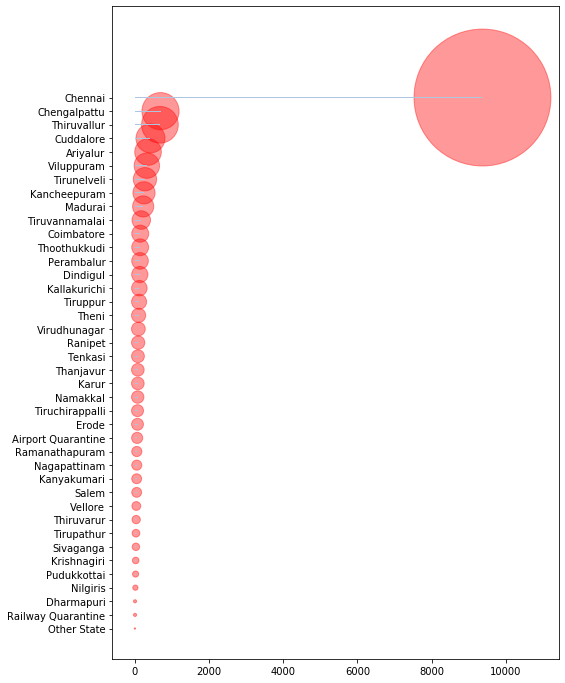

In [96]:
fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(cff.district,cff.confirmed.astype('int'),height=0.07, color='#adc5de', zorder=1)
ax.scatter(cff.confirmed.astype('int'),cff['district'], s=cff.confirmed.astype('int')*2,color="red", alpha=0.4,)
plt.show()

In [97]:
top = ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Andhra Pradesh','Punjab', "West Bengal",'Telangana','Karnataka']

In [98]:
def rotate(point, origin=(0, 0), angle=0):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [99]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

In [100]:
def calculate_xy(r1,r2,r3):
    x= (r1*r1+r1*r3+r1*r2-r2*r3)/(r1+r2)
    y = math.sqrt((r1+r3)*(r1+r3)-x*x)
    return x,y

In [101]:
cff=a_df[a_df['state']=='Tamil Nadu'].sort_values('confirmed',ascending=False)
dff=cff.head(4)

Stackoverflow https://lsandig.org/blog/2014/08/apollon-python/en/#descartes-and-his-disciples

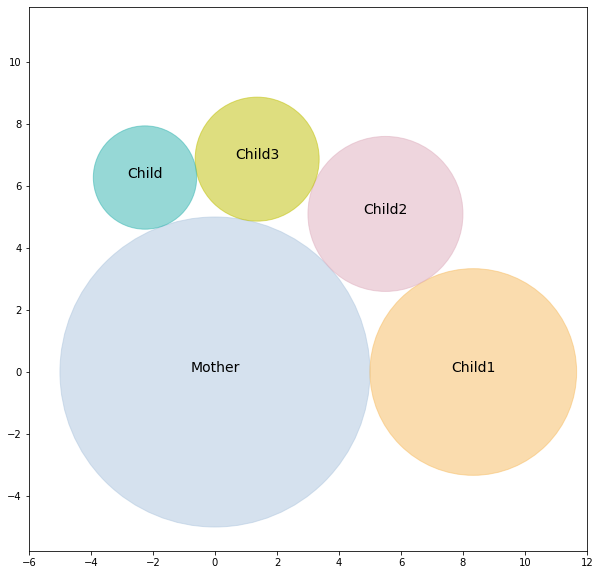

In [102]:
import math
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

d1=6
d2=4
d0=10 

x=0
y=0
r1=d0/2


ax.add_patch(plt.Circle((x, y), r1, color='#adc5de', clip_on=True,alpha=0.5))
ax.text(x, y, "Mother",   size=14,        ha='center')

r2=d0/3
x=r1+r2
y=0
ax.add_patch(plt.Circle((x, y), r2, color='#f7bb5f', clip_on=True,alpha=0.5))
ax.text(x, y, "Child1",   size=14,        ha='center')

r3=d0/4

x,y=calculate_xy(r1,r2,r3)

ax.add_patch(plt.Circle((x, y), r3, color='#deadbd', clip_on=True,alpha=0.5))
ax.text(x, y, "Child2",   size=14,        ha='center')
#################
#here we calculate the x,y co-ordinates of child3 and also need to claculate the angle of roatation
r4=d0/5
deg = angle_between((x,y),(0,0))

x1,y1=calculate_xy(r1,r3,r4)
x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))

ax.add_patch(plt.Circle((x, y), r4, color='y', clip_on=True,alpha=0.5))
ax.text(x, y, "Child3",   size=14,        ha='center')


r5=d0/6
deg = angle_between((x,y),(0,0))

x1,y1=calculate_xy(r1,r4,r5)
x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))
ax.add_patch(plt.Circle((x, y), r5, color='#2fb3af', clip_on=True,alpha=0.5))
ax.text(x, y, "Child",   size=14,        ha='center')

#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlim((-6, 12))
ax.set_ylim((-6, 12))

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

In [103]:
def draw_bubblechart(ax,df,title,category_col,count_col,bubbles=5):
    d1=6
    d2=4
    d0=10 

    x=0
    y=0
    r1=d0/2
    
    s1 = 14 #mother bubble
    s2 = 10 #font size on child bubbles
    
    sf=df[count_col].sum()
    cf=df[count_col].head(4)
    df=df[category_col].head(4)

    ax.add_patch(plt.Circle((x, y), r1, color='#adc5de', clip_on=True,alpha=0.5))
    ax.text(x, y+0.6,     title,   size=s1,        ha='center')
    ax.text(x, y,     int(sf),   size=s1,        ha='center')

    r2=d0/3
    x=r1+r2
    y=0
    ax.add_patch(plt.Circle((x, y), r2, color='#f7bb5f', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[0],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[0]),   size=s2,        ha='center')

    r3=d0/4
    x= (r1*r1+r1*r3+r1*r2-r2*r3)/(r1+r2)
    y = math.sqrt((r1+r3)*(r1+r3)-x*x)
    x1,y1=calculate_xy(r1,r2,r3)
    ax.add_patch(plt.Circle((x, y), r3, color='#deadbd', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[1],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[1]),   size=s2,        ha='center')

    deg = angle_between((x,y),(0,0))
    r4=d0/5
    x1,y1=calculate_xy(r1,r3,r4)
    x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))

    ax.add_patch(plt.Circle((x, y), r4, color='y', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[2],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[2]),   size=s2,        ha='center')

    deg = angle_between((x,y),(0,0))
    r5=d0/6
    x1,y1=calculate_xy(r1,r4,r5)
    x,y = rotate((x1,y1),(0,0),angle=math.radians(deg))
    ax.add_patch(plt.Circle((x, y), r5, color='#2fb3af', clip_on=True,alpha=0.5))
    ax.text(x, y+0.5, df.iloc[3],   size=s2,        ha='center')
    ax.text(x, y,     int(cf.iloc[3]),   size=s2,        ha='center')

    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor('#adc5de')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim((-6, 12))
    ax.set_ylim((-6, 12))


In [104]:
top=a_df.groupby('state').sum().sort_values('confirmed',ascending=False).index

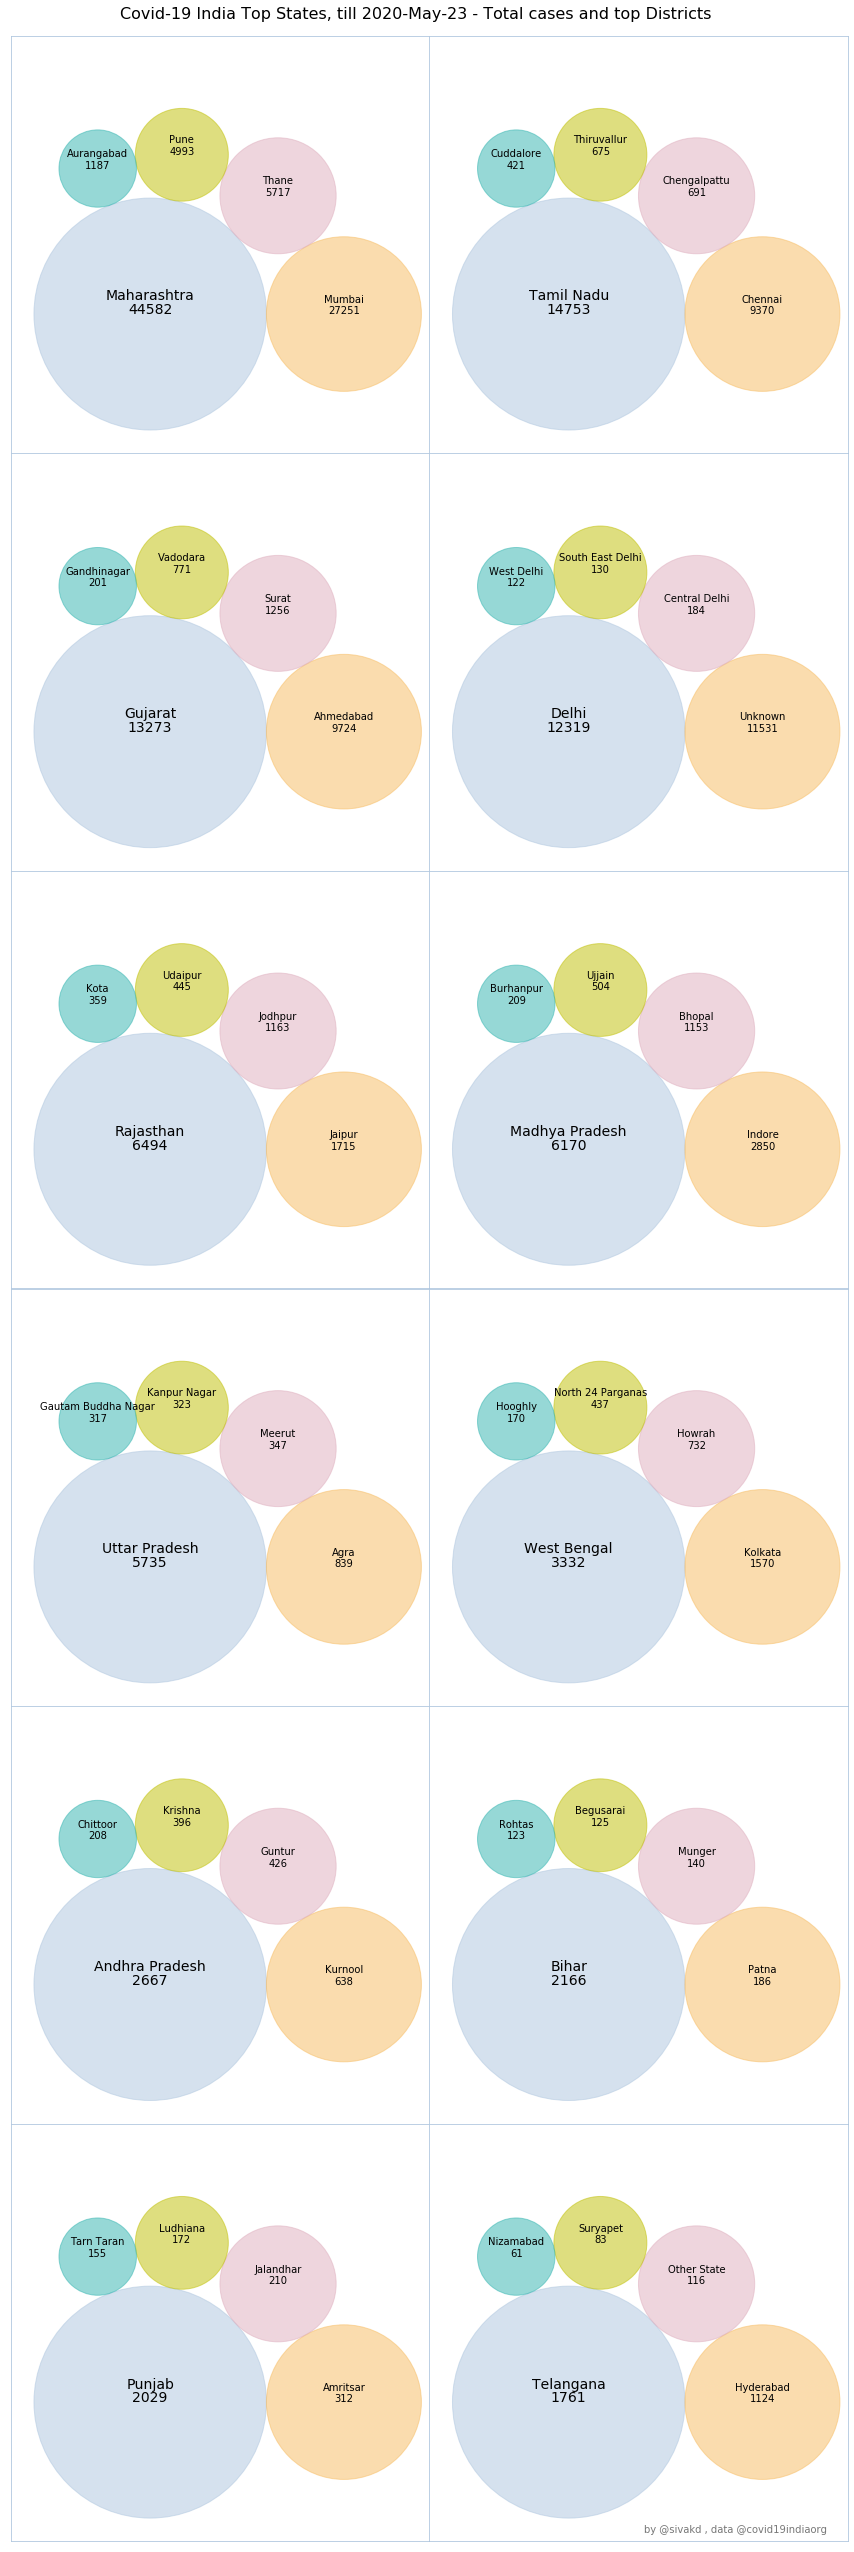

In [108]:
#a_df=a_df[a_df['district']!='Unknown']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,40),  
                                             sharex=False, sharey=False)
i=0 #ignoring all Idia
for ax in axes.flatten():
    t=top[i]
    #cff = cff[cff['district']!='Unknown']
    cff=a_df[a_df['state']==t].sort_values('confirmed',ascending=False)
    draw_bubblechart(ax,cff,t,'district','confirmed')
    #ax.set_facecolor('#fcfcf2') 
    i = i+1
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=0.0002, hspace=0.0002)
fig.suptitle("Covid-19 India Top States, till 2020-"+today+" - Total cases and top Districts",size=16,y=0.89)
plt.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
plt.savefig("covid-top-states-Des-bubble-"+today+".png",bbox_inches = "tight")
plt.show()

In [106]:
top

Index(['Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Rajasthan',
       'Madhya Pradesh', 'Uttar Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Bihar', 'Punjab', 'Telangana', 'Karnataka', 'State Unassigned',
       'Jammu and Kashmir', 'Odisha', 'Haryana', 'Kerala', 'Jharkhand',
       'Assam', 'Chandigarh', 'Tripura', 'Chhattisgarh', 'Himachal Pradesh',
       'Uttarakhand', 'Goa', 'Ladakh', 'Andaman and Nicobar Islands',
       'Puducherry', 'Manipur', 'Meghalaya', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu', 'Arunachal Pradesh',
       'Sikkim', 'Nagaland', 'Lakshadweep'],
      dtype='object', name='state')

In [107]:
import plotly